<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy

In [3]:
from scipy.optimize import curve_fit

def equilibrium(x, a, b, c):
	return a*x**2+b*x+c
popt, pcov = curve_fit(equilibrium, x1, y1)
print(popt)

[-0.52823308  1.50820635  0.00958757]


Text(0, 0.5, 'y')

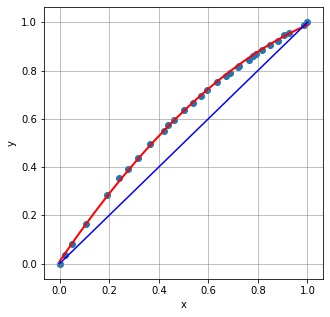

In [5]:
x1 = [0,0.0207,0.0517,0.1063,0.1914,0.2399,0.2761,0.3149,0.3653,0.4221,0.4359,0.4626,0.4999,0.5383,0.5699,0.5941,
      0.6334,0.6721,0.6869,0.7197,0.7222,0.7639,0.7795,0.7906,0.8167,0.8506,0.8791,0.9049,0.9266,0.9843,1]
y1 = [0,0.034,0.08232,0.1652,0.2851,0.3528,0.3932,0.4366,0.4948,0.5513,0.5738,0.5964,0.6355,0.6662,0.6961,0.7179,
      0.7535,0.7778,0.7903,0.8151,0.8201,0.8424,0.8595,0.869,0.887,0.9055,0.9237,0.9469,0.9572,0.9905,1]

x2 = np.linspace(0, 1, 30)
y2 = x2

fig, ax = plt.subplots(figsize=(5,5))

plt.plot(x2, equilibrium(x2, *popt), color='red', linewidth=2)
ax.plot(x2, y2, color="blue")
plt.scatter(x1, y1)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

In [6]:
from scipy.optimize import curve_fit

def equilibrium(x, a, b, c, d):
	return a*x**3+b*x**2+c*x+d
popt, pcov = curve_fit(equilibrium, x1, y1)
print(popt)
print(pcov)

[ 2.46373294e-01 -8.99578389e-01  1.65400289e+00 -1.19504548e-04]
[[ 4.75564043e-04 -7.16792656e-04  2.81424889e-04 -1.87373287e-05]
 [-7.16792656e-04  1.11356868e-03 -4.57457545e-04  3.36608279e-05]
 [ 2.81424889e-04 -4.57457545e-04  2.02482203e-04 -1.79485141e-05]
 [-1.87373287e-05  3.36608279e-05 -1.79485141e-05  2.63383956e-06]]


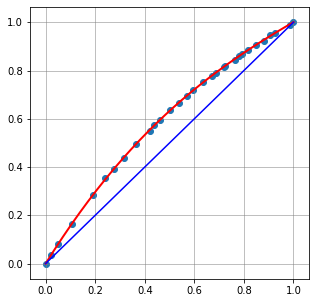

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x2, equilibrium(x2, *popt), color='red', linewidth=2)
ax.plot(x2, y2, color="blue")
plt.scatter(x1, y1)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

In [0]:
T=[450.6,450.0,449.3,448.0,446.0,444.9,444.2,443.4,442.1,441.1,440.6,440.0,439.3,438.4,437.6,437.1,436.3,435.6,435.3,434.6,434.4,433.6,433.2,433.0,432.5,431.8,431.3,430.6,430.2,429.5,429.4]

In [9]:
print(len(x1))
print(len(y1))
print(len(T))

31
31
31


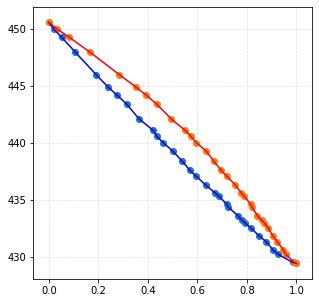

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x1, T, color="blue", label="y(x)")
ax.plot(y1, T, color="red", label="y'(x)")
ax.grid(which="both", ls=':', lw=0.5)
plt.scatter(x1, T)
plt.scatter(y1, T)

[-1.36605269e-05  1.82561380e-02 -8.17642995e+00  1.22736199e+03]
[-2.32547726e-05  2.97511974e-02 -1.27190789e+01  1.81809461e+03]


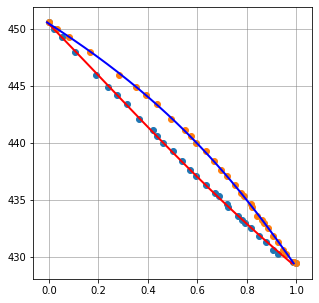

In [18]:
def dewpoint(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d
popt2, pcov2 = curve_fit(dewpoint, T, x1)
print(popt2)

def boilingpoint(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d
popt3, pcov3 = curve_fit(boilingpoint, T, y1)
print(popt3)

T_0 = np.linspace(450.6, 429.4, 30)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(dewpoint(T_0, *popt2), T_0, color='red', linewidth=2)
plt.plot(boilingpoint(T_0, *popt3), T_0, color='blue', linewidth=2)
plt.scatter(x1, T)
plt.scatter(y1, T)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

In [0]:
Rd=3

xf=0.5
xd=0.95
xb=0.02
x_rectify=np.linspace(0.5,0.95,30)
x_remove=np.linspace(0.02,0.5,30)
x=np.linspace(0, 1, 30)

def eqb(x):
  return 0.246*x**3-0.900*x**2+1.654*x-1.195e-4
def rectify(x):
  return (xd-xd/(Rd+1))/xd*x+xd/(Rd+1)
def remove(x):
  return (rectify(xf)-xb)/(xf-xb)*(x-xb)+xb


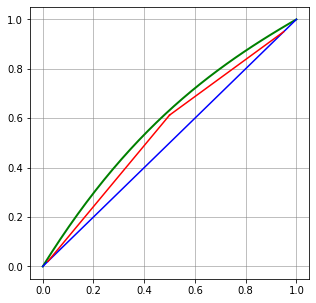

In [19]:
ig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x, eqb(x), color='green', linewidth=2)
ax.plot(x, x, color="blue")
ax.plot(x_rectify, rectify(x_rectify), color="red")
ax.plot(x_remove, remove(x_remove), color="red")

ax.grid(color="gray", which="both", ls='-', lw=0.5)

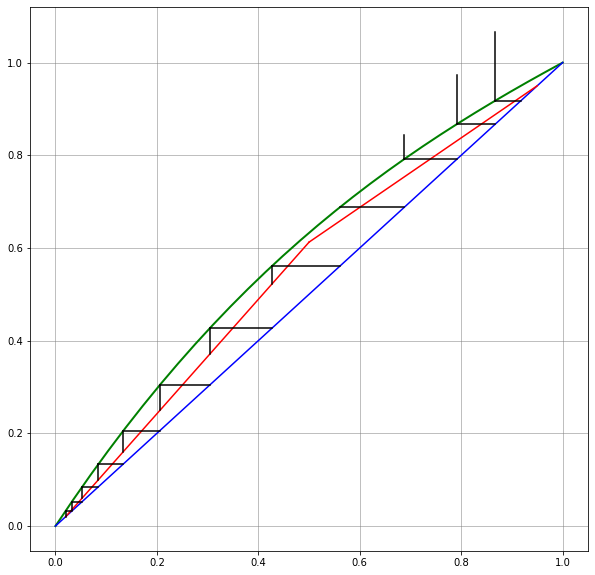

In [24]:
ig, ax = plt.subplots(figsize=(10, 10))

plt.plot(x, eqb(x), color='green', linewidth=2)
ax.plot(x, x, color="blue")
ax.plot(x_rectify, rectify(x_rectify), color="red")
ax.plot(x_remove, remove(x_remove), color="red")

ax.grid(color="gray", which="both", ls='-', lw=0.5)

xi=xb
yi=xb
for number in range(12):
  number+=1
  ax.plot([xi,xi],[yi,eqb(xi)], color='black')
  ax.plot([xi,eqb(xi)],[eqb(xi),eqb(xi)], color='black')
  xi=eqb(xi)
  yi=remove(xi)

In [0]:
ig, ax = plt.subplots(figsize=(10,5))

plt.plot(x, eqb(x), color='black', linewidth=2)
ax.axis('tight')
ax.plot(x, x, color="black")
ax.plot([0.5,0.5],[0.5,0.8],lw=2,label="FeedLine", color='red')

ax.grid(color="gray", which="both", ls='-', lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend();

In [0]:
ig, ax = plt.subplots(figsize=(10,5))

plt.plot(x, eqb(x), color='black', linewidth=2)
ax.plot(x, x, color="black")
ax.plot([0.5,0.5],[0.5,0.7],color='black')
ax.plot(x_rectify, rectify(x_rectify),lw=2, label="OperatingLine", color="red")
ax.plot(x_remove, remove(x_remove),lw=2, color="red")

ax.grid(color="gray", which="both", ls='-', lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend();